This dataset is about kickstarter projects sourced from kaggle

In [26]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
LiveProjects = pd.read_csv("live.csv")

In [28]:
LiveProjects.head(n=5)

,Unnamed: 0,amt.pledged,blurb,by,country,currency,end.time,location,percentage.funded,state,title,type,url
0,0,15823.0,"\n'Catalysts, Explorers & Secret Keepers: Wome...",Museum of Science Fiction,US,usd,2016-11-01T23:59:00-04:00,"Washington, DC",186,DC,"Catalysts, Explorers & Secret Keepers: Women o...",Town,/projects/1608905146/catalysts-explorers-and-s...
1,1,6859.0,\nA unique handmade picture book for kids & ar...,"Tyrone Wells & Broken Eagle, LLC",US,usd,2016-11-25T01:13:33-05:00,"Portland, OR",8,OR,The Whatamagump (a hand-crafted story picture ...,Town,/projects/thewhatamagump/the-whatamagump-a-han...
2,2,17906.0,\nA horror comedy about a repairman who was in...,Tessa Stone,US,usd,2016-11-23T23:00:00-05:00,"Los Angeles, CA",102,CA,Not Drunk Enough Volume 1!,Town,/projects/1890925998/not-drunk-enough-volume-1...
3,3,67081.0,\nThe Johnny Wander autobio omnibus you've all...,Johnny Wander,US,usd,2016-11-01T23:50:00-04:00,"Brooklyn, NY",191,NY,Our Cats Are More Famous Than Us: A Johnny Wan...,County,/projects/746734715/our-cats-are-more-famous-t...
4,4,32772.0,\nThe vision for this project is the establish...,Beau's All Natural Brewing Company,RW,cad,2016-11-18T23:05:48-05:00,"Kigali, Rwanda",34,Kigali Province,The Rwanda Craft Brewery Project,Town,/projects/beaus/the-rwanda-craft-brewery-proje...


In [29]:
Mostbacked = pd.read_csv("most_backed.csv")

In [30]:
Mostbacked.head(n=5)

,Unnamed: 0,amt.pledged,blurb,by,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [31]:
Columns = ["amt.pledged","category","currency","location","goal","num.backers"]

In [32]:
Columns1 = ["amt.pledged","currency","location","percentage.funded"]

In [33]:
LDF = LiveProjects[Columns1]
MBDF = Mostbacked[Columns]

In [34]:
MBDF.head()

,amt.pledged,category,currency,location,goal,num.backers
0,8782571.0,Tabletop Games,usd,"Los Angeles, CA",10000.0,219382
1,6465690.0,Product Design,usd,"Denver, CO",15000.0,154926
2,5408916.0,Web,usd,"Los Angeles, CA",1000000.0,105857
3,5702153.0,Narrative Film,usd,"San Diego, CA",2000000.0,91585
4,3336371.0,Video Games,usd,"San Francisco, CA",400000.0,87142


In [35]:
cols = ["amt.pledged","goal","num.backers"]
for col in cols:
  MBDF[col] = (MBDF[col] - MBDF[col].mean())/MBDF[col].std(ddof=0)

C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
MBDF.head()

,amt.pledged,category,currency,location,goal,num.backers
0,11.930327,Tabletop Games,usd,"Los Angeles, CA",-0.408604,29.500146
1,8.675586,Product Design,usd,"Denver, CO",-0.369127,20.688890
2,7.191036,Web,usd,"Los Angeles, CA",7.407866,13.981065
3,7.602973,Narrative Film,usd,"San Diego, CA",15.303290,12.030056
4,4.279536,Video Games,usd,"San Francisco, CA",2.670611,11.422690


In [37]:
MBDF.dtypes

amt.pledged    float64
category        object
currency        object
location        object
goal           float64
num.backers    float64
dtype: object

In [38]:
cat_columns = MBDF.select_dtypes(['category']).columns

In [39]:
cat_columns

Index([], dtype='object')

In [40]:
for col in ['category', 'currency', 'location']:
    MBDF[col] = MBDF[col].astype('category')

C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
MBDF.dtypes

amt.pledged     float64
category       category
currency       category
location       category
goal            float64
num.backers     float64
dtype: object

In [42]:
cat_columns = MBDF.select_dtypes(['category']).columns
cat_columns

Index(['category', 'currency', 'location'], dtype='object')

In [43]:
MBDF[cat_columns] = MBDF[cat_columns].apply(lambda x: x.cat.codes)

C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [44]:
MBDF.head()

,amt.pledged,category,currency,location,goal,num.backers
0,11.930327,99,8,401,-0.408604,29.500146
1,8.675586,80,8,182,-0.369127,20.688890
2,7.191036,109,8,401,7.407866,13.981065
3,7.602973,68,8,606,15.303290,12.030056
4,4.279536,107,8,607,2.670611,11.422690


In [46]:
#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(MBDF)
labels = kmeans.labels_

#Glue back to originaal data
MBDF['clusters'] = labels



C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
MBDF.head(n=10)

,amt.pledged,category,currency,location,goal,num.backers,clusters
0,11.930327,99,8,401,-0.408604,29.500146,0
1,8.675586,80,8,182,-0.369127,20.688890,1
2,7.191036,109,8,401,7.407866,13.981065,0
3,7.602973,68,8,606,15.303290,12.030056,3
4,4.279536,107,8,607,2.670611,11.422690,3
5,28.164715,80,8,526,3.460154,10.237348,3
6,5.477202,107,8,479,6.618323,9.681518,0
7,5.193436,107,8,314,8.197408,9.624240,4
8,2.528787,107,5,183,0.894141,9.517612,1
9,3.817357,100,1,713,0.459892,9.096024,2


In [52]:
cols.extend(['clusters'])
cols
print MBDF.groupby(['clusters']).mean()

SyntaxError: invalid syntax (<ipython-input-52-9b9136aa7834>, line 3)

C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


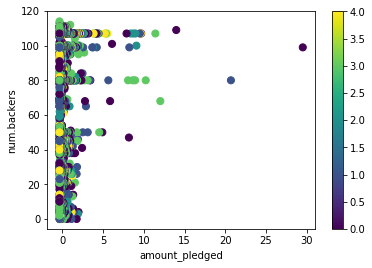

In [62]:
%matplotlib inline  
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(MBDF['num.backers'],MBDF['category'],c=MBDF['clusters'],s=50)
ax.set_xlabel('amount_pledged')
ax.set_ylabel('num.backers')
plt.colorbar(scatter)

fig.show()

In [88]:
colsk = ['amt.pledged','category']
MBDF2 = MBDF[colsk]
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(MBDF2)
labels2 = kmeans2.labels_

#Glue back to originaal data
MBDF2['clusters'] = labels2
MBDF2.head()


C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,amt.pledged,category,clusters
0,11.930327,99,2
1,8.675586,80,1
2,7.191036,109,2
3,7.602973,68,1
4,4.279536,107,2


C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


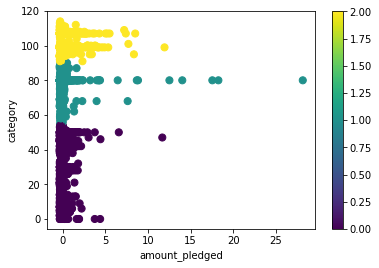

In [89]:
%matplotlib inline  
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(MBDF2['amt.pledged'],MBDF2['category'],c=MBDF2['clusters'],s=50)
ax.set_xlabel('amount_pledged')
ax.set_ylabel('category')
plt.colorbar(scatter)

fig.show()

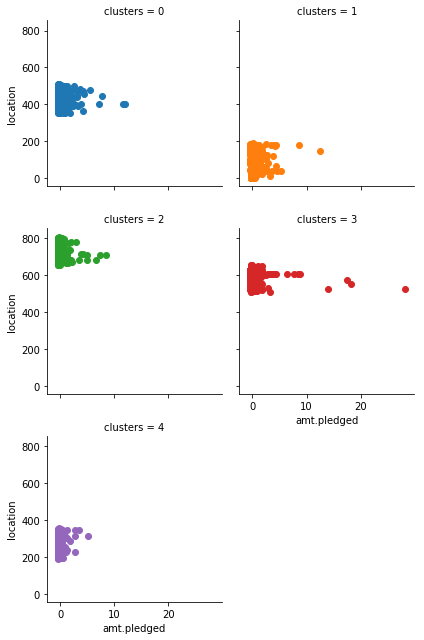

In [81]:
import seaborn as sns
g = sns.FacetGrid(MBDF,col = "clusters" ,hue = "clusters" ,col_wrap=2)
g = g.map(plt.scatter, "amt.pledged" , "location")

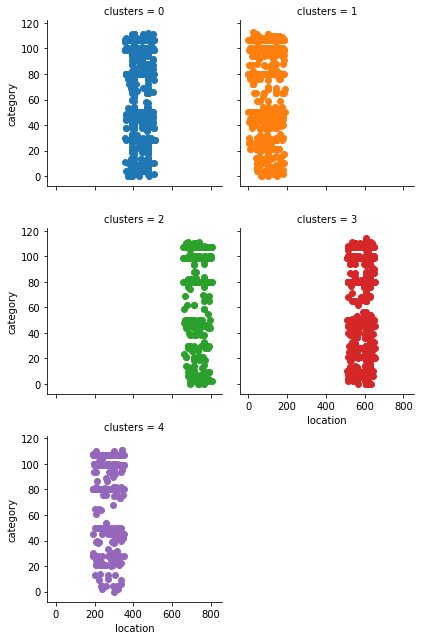

In [85]:
import seaborn as sns
g = sns.FacetGrid(MBDF,col = "clusters" ,hue = "clusters" ,col_wrap=2)
g = g.map(plt.scatter, "location" , "category")

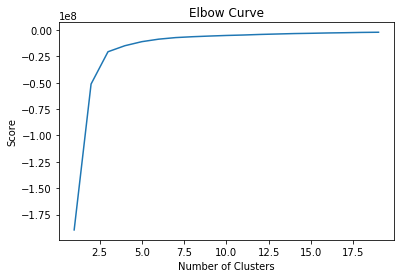

In [87]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(MBDF).score(MBDF) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()